binance 
notebook : scrapeselenium 
data format :
Time: 3h
Article Title: India Seizes $190 Million in Cryptocurrency Linked to Bitconnect Scheme
According to Odaily, Indian authorities have seized nearly $190 million in cryptocurrency connected to the Bitconnect Ponzi scheme, which was dismantled in 2018. The scheme resulted in losses of approximately $2.4 billion for 4,000 investors across 95 countries. Bitconnect, launched in 2016, collapsed in 2018. The founder, Satish Kumbhani, was charged by the U.S. Department of Justice in February 2022 for establishing a global network of promoters who were paid commissions to promote the scheme. In August of last year, the Indian Enforcement Directorate (ED) reported the arrest of Shailesh Babulal Bhatt from Gujarat. Bhatt was accused of kidnapping, extortion, and violating anti-money laundering laws in a major cryptocurrency-related crime exceeding $144 million. Following a complaint filed by Surat police against Bitconnect Coin promoter Satish Kumbhani, the Indian Ministry of Justice launched a money laundering investigation, leading to Bhatt's detention. It is alleged that after Kumbhani shut down the Bitconnect platform in January 2018, he deceived investors and fled. Bhatt, who had invested in Bitconnect, kidnapped two of Kumbhani's employees to recover his funds, extorting 2,091 Bitcoins, 11,000 Litecoins, and cash amounting to 145 million rupees, now valued at 12.325 billion rupees. Bhatt also distributed 2.89 billion rupees of the extorted funds among accomplices for acquiring various assets.
Trading Pair: BTC
Price Change: -0.20%

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = []


with open('scraped_data_clean.txt', 'r',encoding='utf-8') as file:
    content = file.read()


entries = content.split('==================================================')


for entry in entries:
    if entry.strip():  
        lines = entry.strip().split('\n')
        time = lines[0].split(': ')[1]
        article_title = lines[1].split(': ')[1]
        trading_pair = lines[3].split(': ')[1] if len(lines) > 3 else 'N/A'
        price_change = lines[4].split(': ')[1] if len(lines) > 4 else 'N/A'
        
        # Append the extracted information to the data list
        data.append([time, article_title, trading_pair, price_change])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Time', 'Article Content', 'Trading Pair', 'Price Change'])

# Display the DataFrame
df


,Time,Article Content,Trading Pair,Price Change
0,15m,Brian Quintenz Nominated As CFTC Chair By U.S....,N/A,N/A
1,28m,Binance Market Update (2025-02-16),BTC,N/A
2,35m,U.S. Markets to Close for Presidents' Day,N/A,N/A
3,45m,Stablecoin Market Cap Reaches $225.28 Billion,N/A,N/A
4,2h,Expert Suggests Bitcoin As Foundation For Nati...,BTC,-0.20%
...,...,...,...,...
27539,Feb 11,"Bitcoin (BTC) Drops Below 96,000 USDT with a 1...",BTC,-0.94%
27540,Feb 11,Bitcoin Exchange Reserves Hit Three-Year Low A...,BTC,-0.94%
27541,Feb 11,Cryptocurrency Market Sees $170 Million in Liq...,BTC,-0.94%
27542,Feb 11,Cryptocurrency Market Cap Rises Despite Slowed...,BTC,-0.94%


In [5]:
df.shape

(27544, 4)

In [6]:
df.dtypes

Time               object
Article Content    object
Trading Pair       object
Price Change       object
dtype: object

In [20]:
from transformers import pipeline
p=0
n=0

sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

def binary_sentiment(text):
    result = sentiment_pipeline(text)

    # Extract scores for positive and negative
    scores = {res['label']: res['score'] for res in result}
    pos_score = scores.get("positive", 0)
    neg_score = scores.get("negative", 0)

    # Classify based on higher score
    return "Positive" if pos_score > neg_score else "Negative"

for news in df['Article Content'][:1000]:
    result = binary_sentiment(news)
    if (result=="Negative"):
        n=n+1
    else:
        p=p+1

Device set to use cpu


In [21]:
p

284

In [22]:
n

716

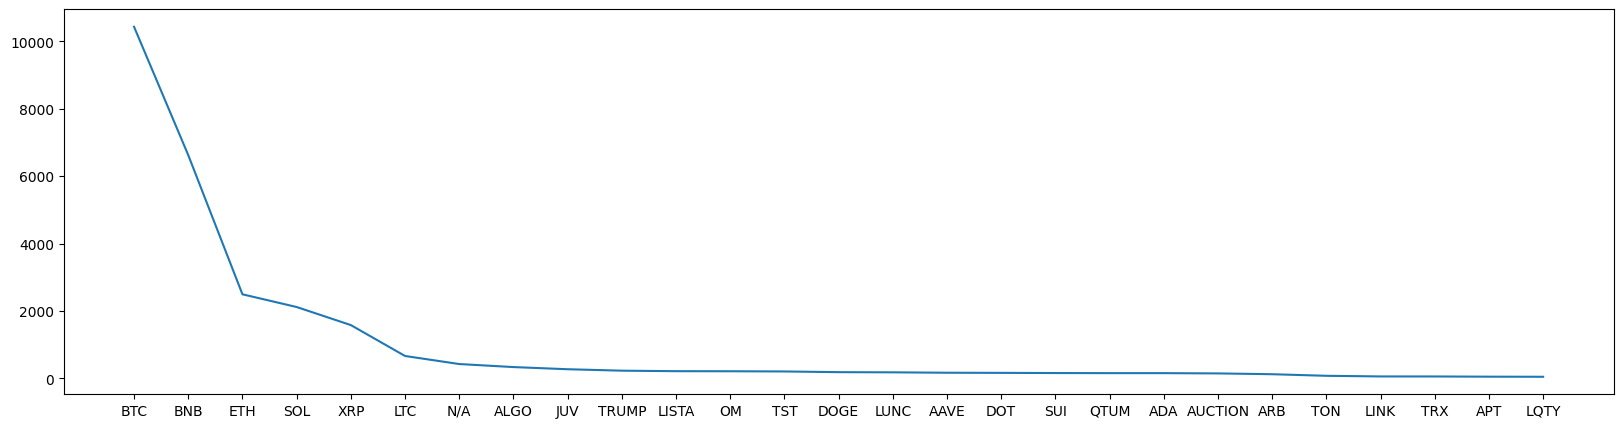

In [42]:
plt.figure(figsize=(20,5))
plt.plot(df["Trading Pair"].value_counts())
plt.show()

In [31]:
df["Time"].value_counts()

Time
Feb 14    5784
Feb 12    5338
Feb 11    4666
Feb 13    4636
Feb 10    3475
          ... 
18m          1
48m          1
17m          1
16m          1
14h          1
Name: count, Length: 73, dtype: int64

res.txt 
=> coindesk.com
data format
title: Argentina Opposition Threatens Milei With Impeachment Over LIBRA Token Tweet: Reuters
link: https://www.coindesk.com/policy
description: An opposition lawmaker said the president should be impeached after promoting and then withdrawing his support for the token.
time: 1 MIN. AGO


In [44]:
import pandas as pd
import re

# Initialize lists to store extracted data
titles, links, descriptions, times, types = [], [], [], [], []

# Read the file
with open("res.txt", "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()
        if line.startswith("title:"):
            titles.append(line.replace("title: ", ""))
        elif line.startswith("link:"):
            link = line.replace("link: ", "")
            links.append(link)
            # Extract the last part of the URL after the last "/"
            types.append(link.rstrip("/").split("/")[-1])
        elif line.startswith("description:"):
            descriptions.append(line.replace("description: ", ""))
        elif line.startswith("time:"):
            times.append(line.replace("time: ", ""))

# Create DataFrame
df = pd.DataFrame({
    "title": titles,
    "description": descriptions,
    "time": times,
    "type": types
})

# Display DataFrame
df


,title,description,time,type
0,Argentina Opposition Threatens Milei With Impe...,An opposition lawmaker said the president shou...,1 MIN. AGO,policy
1,Wrapped AVAX Sees Increased Wallet Accumulatio...,"Nearly 4,000 wallets added WAVAX holdings, 1.8...",19 HOURS AGO,markets
2,Gold-backed Tokens Underperform While Wall Str...,Gold’s price dropped while risk assets rose am...,20 HOURS AGO,markets
3,Strategy Could Be Eligible for S&P 500 Inclusi...,The last hurdle for MSTR to qualify for the S&...,21 HOURS AGO,markets
4,Pump.fun Doubles Down on Memecoin Craze by Sta...,The growing number of new tokens may lead to l...,21 HOURS AGO,markets
...,...,...,...,...
16851,VIRTUAL Surges 28% as Upbit Listing Exposes th...,VIRTUAL is the native token of the AI launchpa...,"JAN 31, 2025",markets
16852,Elon Musk’s Dad Eyes $200M Raise From 'MUSK IT...,Musk’s flirtation with memecoins has remained ...,"JAN 31, 2025",markets
16853,BOJ's Ueda Says Need to Maintain Accommodative...,The slightly dovish take may assuage concerns ...,"JAN 31, 2025",markets
16854,Sam Bankman-Fried’s Parents Seek Presidential ...,Joseph Bankman and Barbara Fried have engaged ...,"JAN 31, 2025",policy


In [ ]:
df['title'][0]
df['description'][0]

'An opposition lawmaker said the president should be impeached after promoting and then withdrawing his support for the token.'

cryptopanic (api):

In [48]:
import pandas as pd
import re


titles, contents, publish_dates, currencies = [], [], [], []


with open("cryptopanic.txt", "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()
        if line.startswith("title:"):
            titles.append(line.replace("title: ", ""))
        elif line.startswith("Content:"):
            contents.append(line.replace("Content: ", ""))
        elif line.startswith("Publish Date:"):
            publish_dates.append(line.replace("Publish Date: ", ""))
        elif line.startswith("Currencies:"):
            currency_list = line.replace("Currencies: ", "").split(", ")
            currencies.append(currency_list[0])  # Get the first currency


df = pd.DataFrame({
    "title": titles,
    "content": contents,
    "publish_date": publish_dates,
    "currency": currencies
})


df


,title,content,publish_date,currency
0,Argentina president Javier Milei claims LIBRA ...,Argentina’s President Javier Milei has denied ...,2025-02-18T09:11:20Z,SOL
1,Michael Saylor on Elon Musk's Acute Post: 'Bit...,Vocal Bitcoiner Saylor has proposed a BTC solu...,2025-02-18T09:07:00Z,BTC
2,$TRUMP Memecoin Airdrop: $50 Bonus for Trump M...,This initiative rewards customers who purchase...,2025-02-18T08:53:26Z,TRUMP
3,Standard Chartered to Launch a Stablecoin Pegg...,Standard Chartered Bank (Hong Kong) Limited (S...,2025-02-18T08:48:09Z,None
4,Monad to roll out a public testnet on Feb. 19,"Monad's testnet, in development for two years,...",2025-02-18T08:45:35Z,None
...,...,...,...,...
1898,$TRUMP Memecoin Airdrop: $50 Bonus for Trump M...,This initiative rewards customers who purchase...,2025-02-18T08:53:26Z,TRUMP
1899,Standard Chartered to Launch a Stablecoin Pegg...,Standard Chartered Bank (Hong Kong) Limited (S...,2025-02-18T08:48:09Z,None
1900,Monad to roll out a public testnet on Feb. 19,"Monad's testnet, in development for two years,...",2025-02-18T08:45:35Z,None
1901,Ethereum client Geth urges validators to updat...,Geth developers urged Ethereum validators usin...,2025-02-18T08:42:00Z,ETH
